* Name : Aniket Devidas Kale
* Class : DSS680
* Predictive Analytics    

In [1]:
# import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option("max_columns",120)
data = pd.read_csv("lending_club_loans.csv", skiprows=1, low_memory=False)
data.shape

(42540, 115)

In [2]:
# data cleaning Lets clean the data
half_count = len(data)/2
data = data.dropna(thresh= half_count, axis =1)

In [3]:
data.shape

(42540, 58)

* Total we have 58 columns and 42538 Rows

data.head()

In [4]:
# Lets drop unimportant columns URL and Desc
data = data.drop(["url", "desc"],axis = 1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,Sep-16,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-16,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,Sep-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,15.0,0.0,27783.0,53.90%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-16,67.79,Sep-16,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(42540, 56)

In [6]:
# data dictonary, Where we can see the defination of all 
data_dict = pd.read_excel("LCDataDictionary.xlsx", )
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
data_dict.shape

(117, 2)

In [8]:
# lets rename the data_dict
data_dict = data_dict.rename(columns={"LoanStatNew": "name"})
data_dict.head()

,name,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [9]:
# Now lets join the Description to dataframe
data_dtype = pd.DataFrame(data.dtypes, columns=["dtypes"])
data_dtype = data_dtype.reset_index()
data_dtype["name"] = data_dtype["index"]
data_dtype = data_dtype[["name","dtypes"]]
data_dtype.head()

,name,dtypes
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64


In [10]:
# insert first value in the dataframe
data_dtype["first_value"] = data.loc[0].values
data_dtype.head()

,name,dtypes,first_value
0,id,object,1077501
1,member_id,float64,1.2966e+06
2,loan_amnt,float64,5000
3,funded_amnt,float64,5000
4,funded_amnt_inv,float64,4975


In [11]:
preview = data_dtype.merge(data_dict,on="name", how= "left")
preview.head()

,name,dtypes,first_value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...


In [12]:
preview.shape

(56, 4)

In [13]:
preview[:19]

,name,dtypes,first_value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...
5,term,object,36 months,The number of payments on the loan. Values are...
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if th...
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


# Now we have to understand the each column
* id - randomly generated field by Lending Club for unique identification purposes only.
* member_id - also randomly generated field by Lending Club for identification purposes only.
* funded_amnt - leaks information from the future(after the loan is already started to be funded).
* funded_amnt_inv - also leaks data from the future.
* sub_grade - contains redundant information that is already in the grade column (more below).
* int_rate - also included within the grade column.
* emp_title - requires other data and a lot of processing to become potentially useful
* issued_d - leaks data from the future.

In [14]:
# drop above columns.
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
data_2007 = data.drop(drop_list, axis =1)
data_2007.shape

(42540, 48)

In [15]:
preview[19:38]

,name,dtypes,first_value,Description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,AZ,The state provided by the borrower in the loan...
22,dti,float64,27.65,A ratio calculated using the borrower’s total ...
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Jan-85,The month the borrower's earliest reported cre...
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO a...
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO a...
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excl...
28,open_acc,float64,3,The number of open credit lines in the borrowe...


* we will drop below columns
* zip_code - mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are 
* visible.
* out_prncp - leaks data from the future.
* out_prncp_inv - also leaks data from the future.
* total_pymnt - also leaks data from the future.
* total_pymnt_inv - also leaks data from the future.

In [16]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']
data_2007 = data_2007.drop(drop_cols, axis=1)
data_2007.shape

(42540, 41)

In [17]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax

In [18]:
preview[38:]

,name,dtypes,first_value,Description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-15,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-16,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last F...
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last F...


* will drop following columns
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt

In [19]:
drop_cols = [ 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']
data_2007 = data_2007.drop(drop_cols, axis=1)
data_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,f,Sep-16,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,f,Sep-16,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,f,Sep-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-16,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,15.0,0.0,27783.0,53.90%,38.0,f,Sep-16,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [20]:
data_2007.shape

(42540, 36)

In [21]:
# high fico range
data_2007.last_fico_range_high.unique()

array([ 744.,  499.,  719.,  604.,  694.,  679.,  654.,  689.,  519.,
        734.,  669.,  619.,  769.,  639.,  794.,  559.,  644.,  684.,
        534.,  779.,  509.,  579.,  599.,  659.,  564.,  704.,  784.,
        739.,  749.,  829.,  774.,  594.,  789.,  614.,  699.,  714.,
        649.,  709.,  664.,  629.,  609.,  729.,  839.,  574.,  754.,
        819.,  544.,  634.,  554.,  799.,  674.,  549.,  724.,  804.,
        569.,  524.,  764.,  759.,  529.,  624.,  504.,  814.,  589.,
        539.,  584.,  809.,  824.,  514.,  834.,  844.,    0.,  850.,   nan])

In [22]:
# low fico range
data_2007.last_fico_range_low.unique()

array([ 740.,    0.,  715.,  600.,  690.,  675.,  650.,  685.,  515.,
        730.,  665.,  615.,  765.,  635.,  790.,  555.,  640.,  680.,
        530.,  775.,  505.,  575.,  595.,  655.,  560.,  700.,  780.,
        735.,  745.,  825.,  770.,  590.,  785.,  610.,  695.,  710.,
        645.,  705.,  660.,  625.,  605.,  725.,  835.,  570.,  750.,
        815.,  540.,  630.,  550.,  795.,  670.,  545.,  720.,  800.,
        565.,  520.,  760.,  755.,  525.,  620.,  500.,  810.,  585.,
        535.,  580.,  805.,  820.,  510.,  830.,  840.,  845.,   nan])

In [23]:
data_2007.to_csv("final", index=False)

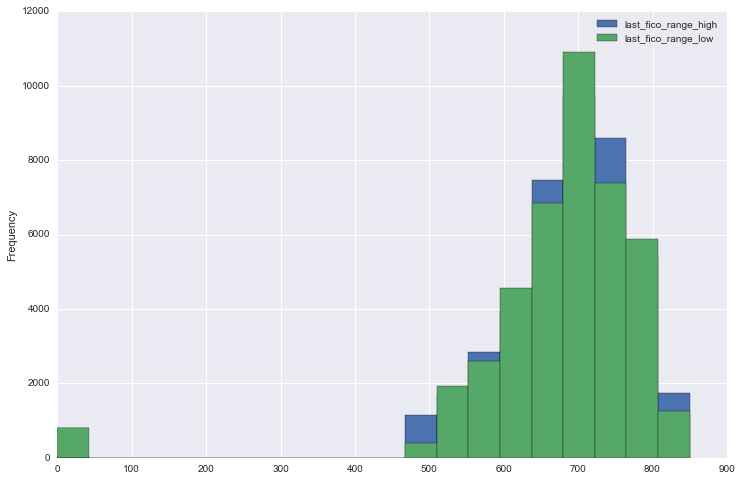

In [23]:
fico_col = ["last_fico_range_high", "last_fico_range_low"]
data_2007.dropna(subset= fico_col, inplace= True )
data_2007[fico_col].plot(kind="hist", bins =20)

In [24]:
data_2007["fico_avg"] = (data_2007["fico_range_high"] + data_2007["fico_range_low"])/2
cols = ['fico_range_low','fico_range_high','fico_avg']
data_2007[cols].head()

,fico_range_low,fico_range_high,fico_avg
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [25]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high']
data_2007 = data_2007.drop(drop_cols, axis=1)
data_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_avg
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,697.0


In [26]:
data_2007.shape

(42535, 33)

In [27]:
# Now we have to decide on the Target columns 
data_2007.loan_status.value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [28]:
data_2007 = data_2007[(data_2007["loan_status"] == "Fully Paid") | (data_2007["loan_status"] == "Charged Off")]

In [29]:
data_2007.loan_status.value_counts()

Fully Paid     33586
Charged Off     5653
Name: loan_status, dtype: int64

In [30]:
data_2007["loan_status"] = data_2007.loan_status.str.contains("Fully Paid").astype(int)

In [31]:
data_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_avg
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963.0,28.30%,12.0,f,Jan-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,732.0


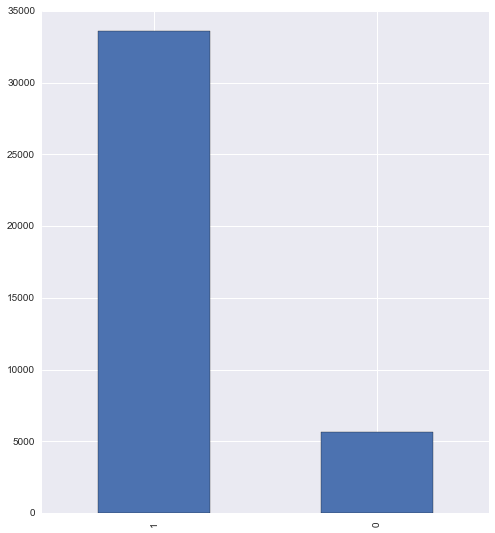

In [32]:
data_2007.loan_status.value_counts().plot(kind = "bar", figsize=(8,9))

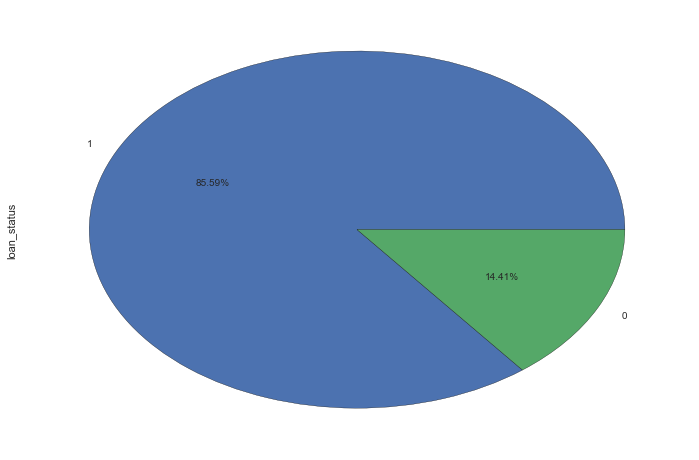

In [33]:
data_2007.loan_status.value_counts().plot(kind = "pie", autopct='%1.2f%%')

In [34]:
data_2007.shape

(39239, 33)

* So Now we have set up the target variable and Now we are going to predict the Loan will be fully paid off or not

In [35]:
data_2007.isnull().sum()

loan_amnt                       0
term                            0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                          10
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc                       0
initial_list_status             0
last_credit_pull_d              2
collections_12_mths_ex_med     56
policy_code                     0
application_type                0
acc_now_delinq                  0
chargeoff_within_12_mths       56
delinq_amnt   

In [36]:
data_2007.loan_status.unique()

array([1, 0])

In [37]:
# only Keep columns which has more than one unique values.
data_2007 =  data_2007.loc[:,data_2007.apply(pd.Series.nunique) != 1]
data_2007.shape

(39239, 25)

In [38]:
data_2007.isnull().sum()

loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
pymnt_plan                0
purpose                   0
title                    10
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    697
fico_avg                  0
dtype: int64

In [39]:
for col in data_2007.columns:
    if (len(data_2007[col].unique()) < 4):
        print(data_2007[col].value_counts())

 36 months    29096
 60 months    10143
Name: term, dtype: int64
Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64
1    33586
0     5653
Name: loan_status, dtype: int64
n    39238
y        1
Name: pymnt_plan, dtype: int64


* In payment Plan we have Only one Yes
* 39238 No, so As result we will delete this column.

In [40]:
data_2007 = data_2007.drop("pymnt_plan", axis = 1)
data_2007.shape

(39239, 24)

In [44]:
data_2007.to_csv("loan_2007", index= False)

* So we have converted our file to loan_2007.csv
* Now we have 24 features and one target variable.
* we will use this file for designing predictive module.
